In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

# Liquid-Solid Boundary Condition

In [ ]:
alpha_L = 
beta_L = 
beta_T =
k_1L =
k_2L =
mu_2


In [ ]:
a = np.array([[3,1], [1,2]])
b = np.array([9,8])

In [ ]:
a

In [ ]:
b

In [ ]:
x = np.linalg.solve(a, b)

In [ ]:
x

In [ ]:
np.dot(a, x)

In [2]:
angles = np.linspace(0, np.pi/2, 100)

In [3]:
angles

array([0.        , 0.01586663, 0.03173326, 0.04759989, 0.06346652,
       0.07933315, 0.09519978, 0.11106641, 0.12693304, 0.14279967,
       0.1586663 , 0.17453293, 0.19039955, 0.20626618, 0.22213281,
       0.23799944, 0.25386607, 0.2697327 , 0.28559933, 0.30146596,
       0.31733259, 0.33319922, 0.34906585, 0.36493248, 0.38079911,
       0.39666574, 0.41253237, 0.428399  , 0.44426563, 0.46013226,
       0.47599889, 0.49186552, 0.50773215, 0.52359878, 0.53946541,
       0.55533203, 0.57119866, 0.58706529, 0.60293192, 0.61879855,
       0.63466518, 0.65053181, 0.66639844, 0.68226507, 0.6981317 ,
       0.71399833, 0.72986496, 0.74573159, 0.76159822, 0.77746485,
       0.79333148, 0.80919811, 0.82506474, 0.84093137, 0.856798  ,
       0.87266463, 0.88853126, 0.90439789, 0.92026451, 0.93613114,
       0.95199777, 0.9678644 , 0.98373103, 0.99959766, 1.01546429,
       1.03133092, 1.04719755, 1.06306418, 1.07893081, 1.09479744,
       1.11066407, 1.1265307 , 1.14239733, 1.15826396, 1.17413

In [142]:
n_air = 1
n_glass = 1.5
n_diamond = 2.4

def alpha(n1=n_air, n2=n_glass, incident_angle=0):
    numerator_squared = 1 - ( n1 / n2 * np.sin(incident_angle) )**2
    numerator = np.sqrt(numerator_squared)
    denominator = np.cos(incident_angle)
    res = numerator / denominator
    return res

def beta(n1=n_air, n2=n_glass, mu1=1, mu2=1):
    permeabilities = mu1 / mu2
    refraction_indices = n2 / n1
    res = permeabilities * refraction_indices
    return res

def r(n1=n_air, n2=n_glass, mu1=1, mu2=1, incident_angle=0):
    a, b = alpha(n1, n2, incident_angle), beta(n1, n2, mu1, mu2)
    numerator = a - b
    denominator = a + b
    res = numerator / denominator
    return res

def t(n1=n_air, n2=n_glass, mu1=1, mu2=1, incident_angle=0):
    a, b = alpha(n1, n2, incident_angle), beta(n1, n2, mu1, mu2)
    denominator = a + b
    res = 2 / denominator
    return res

angles = np.linspace(0, np.pi/2, 100)
rs = r(n1=n_glass, n2=n_diamond, incident_angle=angles)
ts = t(n1=n_glass, n2=n_diamond, incident_angle=angles)


In [143]:
rs

array([-0.23076923, -0.23073292, -0.23062393, -0.23044215, -0.23018734,
       -0.22985921, -0.22945735, -0.22898129, -0.22843045, -0.22780416,
       -0.22710166, -0.22632209, -0.22546451, -0.22452786, -0.22351099,
       -0.22241265, -0.22123146, -0.21996596, -0.21861456, -0.21717556,
       -0.21564714, -0.21402734, -0.21231409, -0.21050517, -0.20859824,
       -0.20659081, -0.20448021, -0.20226365, -0.19993816, -0.19750061,
       -0.19494767, -0.19227583, -0.1894814 , -0.18656048, -0.18350893,
       -0.18032241, -0.17699634, -0.17352589, -0.16990595, -0.16613117,
       -0.16219588, -0.15809411, -0.15381957, -0.14936565, -0.14472535,
       -0.13989131, -0.13485578, -0.12961055, -0.12414701, -0.11845604,
       -0.11252804, -0.10635287, -0.09991984, -0.09321764, -0.08623436,
       -0.07895738, -0.07137338, -0.06346829, -0.05522723, -0.04663443,
       -0.03767322, -0.02832596, -0.01857394, -0.00839735,  0.00222484,
        0.01331491,  0.02489653,  0.03699484,  0.04963656,  0.06

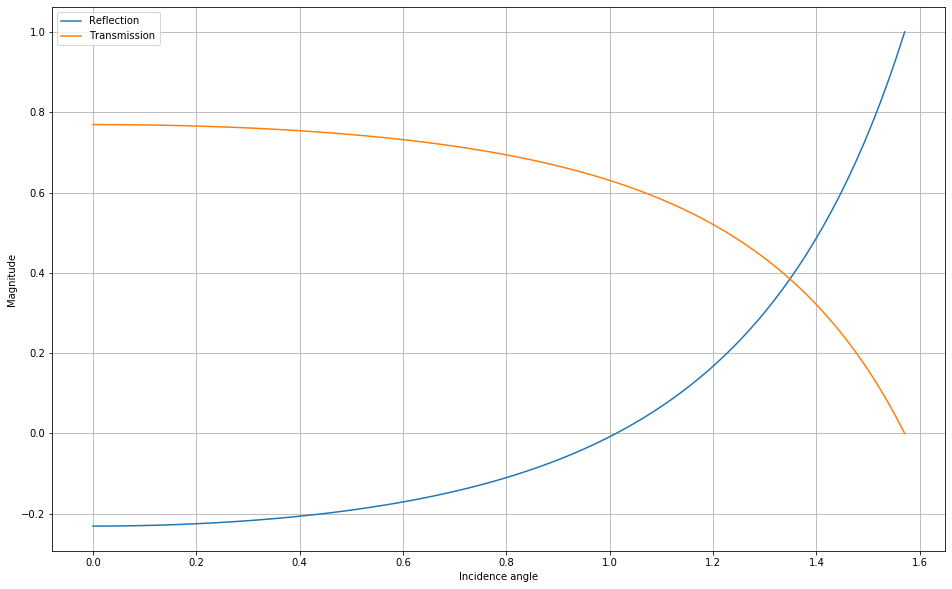

In [144]:
plt.figure(figsize=(16, 10))
plt.plot(angles, rs, label='Reflection')
plt.plot(angles, ts, label='Transmission')
plt.legend()
plt.grid()
plt.xlabel('Incidence angle')
plt.ylabel('Magnitude')
plt.show()

In [4]:
# Aluminum-plexiglass interface
#
c_aluminum_L = 6300.0
c_aluminum_T = 3100.0
c_N = c_aluminum_L
c_1T = c_aluminum_T
c_1L = c_aluminum_L
c_2T = 2670.0
c_2L = 1120.0

In [ ]:
c_N

In [ ]:
angles

In [5]:
alpha_T = np.arcsin((c_1T/c_N) * np.sin(angles))
alpha_L = np.arcsin((c_1L/c_N) * np.sin(angles))
beta_T = np.arcsin((c_2T/c_N) * np.sin(angles))
beta_L = np.arcsin((c_2L/c_N) * np.sin(angles))

In [6]:
#alpha_T

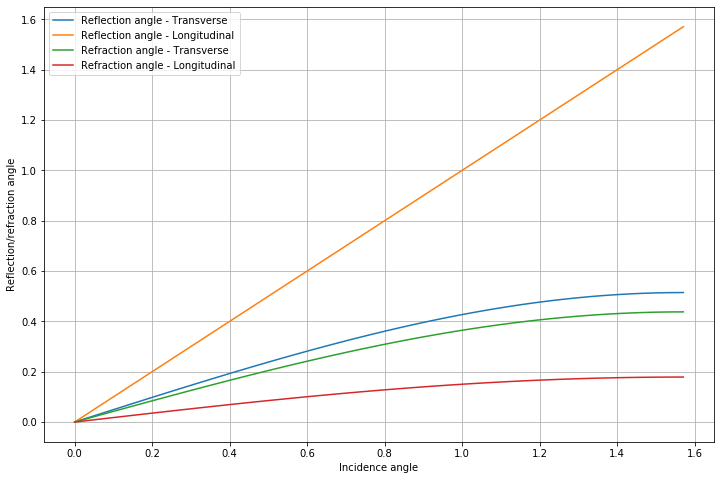

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(angles, alpha_T, label='Reflection angle - Transverse')
plt.plot(angles, alpha_L, label='Reflection angle - Longitudinal')
plt.plot(angles, beta_T, label='Refraction angle - Transverse')
plt.plot(angles, beta_L, label='Refraction angle - Longitudinal')
plt.grid()
plt.legend()
plt.xlabel('Incidence angle')
plt.ylabel('Reflection/refraction angle')
plt.show()

In [71]:
angle_x, angle_y = -np.cos(angles[idx]), np.sin(angles[idx])
alpha_T_x, alpha_T_y = np.cos(alpha_T[idx]), np.sin(alpha_T[idx])
alpha_L_x, alpha_L_y = np.cos(alpha_L[idx]), np.sin(alpha_L[idx])
beta_T_x, beta_T_y = np.cos(beta_T[idx]), -np.sin(beta_T[idx])
beta_L_x, beta_L_y = np.cos(beta_L[idx]), -np.sin(beta_L[idx])

In [139]:
idx = 50
angle_coords = (-np.cos(angles[idx]), np.sin(angles[idx]))
alpha_T_coords = (np.cos(alpha_T[idx]), np.sin(alpha_T[idx]))
alpha_L_coords = (np.cos(alpha_L[idx]), np.sin(alpha_L[idx]))
beta_T_coords = (np.cos(beta_T[idx]), -np.sin(beta_T[idx]))
beta_L_coords = (np.cos(beta_L[idx]), -np.sin(beta_L[idx]))

In [140]:
angle_coords[0]

-0.7014748877063213

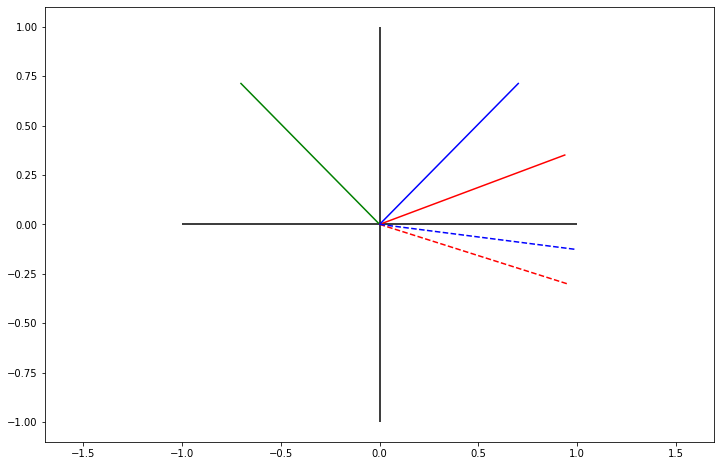

In [141]:
plt.figure(figsize=(12, 8))
plt.hlines(0, -1, 1)
plt.vlines(0, -1, 1)
plt.plot([angle_coords[0], 0], [angle_coords[1], 0], 'g-')
plt.plot([0, alpha_T_coords[0]], [0, alpha_T_coords[1]], 'r-' )
plt.plot([0, alpha_L_coords[0]], [0, alpha_L_coords[1]], 'b-')
plt.plot([0, beta_T_coords[0]], [0, beta_T_coords[1]], 'r--')
plt.plot([0, beta_L_coords[0]], [0, beta_L_coords[1]], 'b--')
plt.axis('equal')

plt.show()

In [69]:
angle_x, angle_y

(6.123233995736766e-17, 1.0)

In [39]:
idx = 15
M = np.array([[-np.cos(alpha_L[idx]), np.sin(alpha_T[idx]), -np.cos(beta_L[idx]), np.sin(beta_T[idx])],
            [-np.sin(alpha_L[idx]), np.cos(alpha_T[idx]), np.sin(beta_L[idx]), np.cos(beta_T[idx])]])

In [47]:
idx = 15
M = np.array([[-np.cos(alpha_L[idx]), np.sin(alpha_T[idx])],
            [-np.sin(alpha_L[idx]), np.cos(alpha_T[idx]), ]])

In [32]:
M = np.array([[-np.cos(alpha_L), np.sin(alpha_T)],
            [-np.sin(alpha_L), np.cos(alpha_T), ]])

In [40]:
M

array([[-0.97181157,  0.11600837, -0.99912128,  0.09991688],
       [-0.23575894,  0.99324824,  0.0419127 ,  0.99499579]])

In [48]:
a_L = np.array([[-np.cos(alpha_L[idx])],
               [np.sin(alpha_L[idx])]])

In [45]:
a_L = np.array([[-np.cos(alpha_L)],
               [np.sin(alpha_L)]])

In [49]:
x = np.linalg.solve(M, a_L)

In [50]:
x

array([[1.05832179],
       [0.48856644]])

In [66]:
#M = np.zeros(len(angles))
for idx in range(len(angles)):
    M = np.array([[-np.cos(alpha_L[idx]), np.sin(alpha_T[idx])],
            [-np.sin(alpha_L[idx]), np.cos(alpha_T[idx])]])
    a_L = np.array([[-np.cos(alpha_L[idx])],
               [np.sin(alpha_L[idx])]])
    x = np.linalg.solve(M, a_L)
    print(idx, x)

0 [[1.]
 [0.]]
1 [[1.0002478 ]
 [0.03173683]]
2 [[1.00099179]
 [0.06349507]]
3 [[1.00223373]
 [0.09529624]]
4 [[1.00397655]
 [0.12716199]]
5 [[1.0062244 ]
 [0.15911422]]
6 [[1.00898263]
 [0.19117518]]
7 [[1.01225786]
 [0.2233675 ]]
8 [[1.01605803]
 [0.25571433]]
9 [[1.02039238]
 [0.28823943]]
10 [[1.02527159]
 [0.32096726]]
11 [[1.03070781]
 [0.35392307]]
12 [[1.03671472]
 [0.38713306]]
13 [[1.04330766]
 [0.42062445]]
14 [[1.05050371]
 [0.45442567]]
15 [[1.05832179]
 [0.48856644]]
16 [[1.06678285]
 [0.523078  ]]
17 [[1.07590995]
 [0.55799322]]
18 [[1.08572846]
 [0.59334685]]
19 [[1.09626627]
 [0.62917567]]
20 [[1.10755398]
 [0.66551879]]
21 [[1.11962515]
 [0.70241786]]
22 [[1.13251659]
 [0.73991739]]
23 [[1.14626864]
 [0.77806507]]
24 [[1.16092557]
 [0.81691216]]
25 [[1.17653597]
 [0.85651387]]
26 [[1.19315318]
 [0.89692987]]
27 [[1.21083588]
 [0.9382248 ]]
28 [[1.22964861]
 [0.98046891]]
29 [[1.24966256]
 [1.02373874]]
30 [[1.27095627]
 [1.06811793]]
31 [[1.29361663]
 [1.11369815]]
32

In [63]:
M

array([[-6.12323400e-17,  4.92063492e-01],
       [-1.00000000e+00,  8.70559314e-01]])